K Nearest Neighbors learning algorithm to classify handwritten digits:

•MNIST-5-6-Subset.txt is a space-separated file of real numbers (written
as text).1 It contains a 784×1877 matrix, written column-by-column (the
first 784 numbers in the file correspond to the first column; the next 784 numbers are the second column, and so on).

•Each column in the matrix above is a 28×28 grayscale image of a digit,
stored column-by-column (the first 28 out of 784 values correspond to the
first column of the 28 ×28 image, the next 28 values correspond to the
second column, and so on). 

•MNIST-5-6-Subset-Labels.txt is a space-separated file of 1877 integers.
The numbers label the images in MNIST-5-6-Subset.txt file: the first
number (“5”) is the number drawn in the image corresponding to the first
column; the second number corresponds to the second column, and so on.

•MNIST-5-6-Subset-Light-Corruption.txt,
MNIST-5-6-Subset-Moderate-Corruption.txt, and
MNIST-5-6-Subset-Heavy-Corruption.txt are corrupted versions of
the digits in MNIST-5-6-Subset.txt, the order is preserved. It is a good
idea to visualize the corrupted images to get some feeling of the corruption.


In [413]:
import numpy as np
from numpy import linalg as la
from numpy import log as ln
import math
import matplotlib.pyplot as plt

In [414]:
#Load File 
#insert file path into string below
file = r"C:\Users\danyel\Downloads\MNIST-5-6-Subset.txt"
labels = r"C:\Users\danyel\Downloads\MNIST-5-6-Subset-Labels.txt"
lightCorrupt = r"C:\Users\danyel\Downloads\MNIST-5-6-Subset-Light-Corruption.txt"
moderateCorrupt = r"C:\Users\danyel\Downloads\MNIST-5-6-Subset-Moderate-Corruption.txt"
heavyCorrupt = r"C:\Users\danyel\Downloads\MNIST-5-6-Subset-Heavy-Corruption.txt"
#convert labels
labels = np.loadtxt(labels)
labels = np.reshape(labels, (-1, 1))
#convert text into numpy array and split values into rows and columns
data = np.loadtxt(file, dtype = float)
data1 = np.reshape(data, (1877, 784))
datas = data1.copy()
datas = np.append(datas, labels, axis = 1)
data1 = np.transpose(data1)
#convert light corrupt data
lightData = np.loadtxt(lightCorrupt, dtype = float)
lightData = np.reshape(lightData, (1877, 784))
lightData = np.transpose(lightData)
#convert moderate corrupt data
moderateData = np.loadtxt(moderateCorrupt, dtype = float)
moderateData = np.reshape(moderateData, (1877, 784))
moderateData = np.transpose(moderateData)
#convert heavy corrupt data
heavyData = np.loadtxt(heavyCorrupt, dtype = float)
heavyData = np.reshape(heavyData, (1877, 784))
heavyData = np.transpose(heavyData)

In [415]:
#Function to plot and shows the image of row
def viewImage(data, index):
    x = data[:, index]
    x1 = np.reshape(x, (28, 28))
    x1 = np.transpose(x1)
    return plt.imshow(x1)
#Function that returns the row at index with data
def numberMatrix(data, index):
    x = data[:, index]
    x1 = np.reshape(x, (28, 28))
    x1 = np.transpose(x1)
    return x1

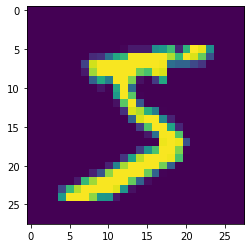

In [416]:
viewImage(data1, 0)

In [417]:
#creating training set and values
training = datas[:100]
#List of different n to test
n = [10, 20, 40, 80]
#different sets
sets = [1, 2, 3, 4, 5]
#List of different values of k from 1 to 50
k= list(range(1, 51))

In [436]:
#Functions
#getting the square Euclidean Distance of two vectors
#can be used on matrix - will return a matrix of distances
def squareEuclideanDistance(m1, m2):
    subtracted = np.subtract(m1, m2)
    transposed = np.transpose(subtracted)
    return np.matmul(subtracted, transposed)

#get the index(s) of nearest k neighbors 
def getNeighbors(test, k):
    tests = np.tile(test, (100, 1))
    tests1 = np.delete(tests, -1, axis = 1)
    training1 = np.delete(training, -1, axis = 1)
    #Bring up distance function
    distance = squareEuclideanDistance(tests1, training1)
    #values of distance are in diagonal elements
    distances = np.diag(distance)
    #creating a list of index to map to distances
    idx = list(range(0,100))
    #Sorting the list of index according to value in distances
    idx.sort(key = lambda x: distances[x])
    neighbors = idx[:k]
    return neighbors

def predict(test, k):
    neighbors = getNeighbors(test, k)
    #fetching indexes for nearest neighbors
    output = [training[idx][-1] for idx in neighbors]
    #predicting y based on the max output of nearest neighbors
    prediction = max(set(output), key = output.count)
    return prediction

#zero-one loss function
def validationError(set1, n, k):
    startIdx = 100 + set1 * n + 1
    endIdx = 100 + (set1 + 1) * n  
    error = 0
    #creating the test set
    testSet = datas[startIdx: endIdx + 1]
    for i in range(len(testSet)):
        if predict(testSet[i], k) != testSet[i][-1]:
            error += 1
    return error

#k = 1 to k = 50 validation errors for each se
def validationErrorToK(set1, n):
    errors = []
    for i in k:
        errors.append(validationError(set1, n, i))
    return errors

#all error lists from test sets 1 to 5
def allErrors(n):
    errors = []
    for i in range(1, 6):
        errors.append(validationErrorToK(i, n))
    return errors

In [437]:
#List of list of validation errors from k = 1 to k =50
n10 = allErrors(10)
n20 = allErrors(20)
n40 = allErrors(40)
n80 = allErrors(80)

In [426]:
xlabel = "K" 
ylabel = "Validation error" 

fluctuations of validation error as a function of the size of validation set and the dependence of the validation error on the number of neighbors K.

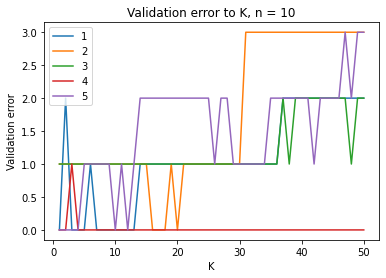

In [460]:
#Plot when n = 10
title = "Validation error to K, n = 10"
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(k, n10[0], label = "1")
plt.plot(k, n10[1], label = "2")
plt.plot(k, n10[2], label = "3")
plt.plot(k, n10[3], label = "4")
plt.plot(k, n10[4], label = "5")
plt.legend(loc = "upper left")


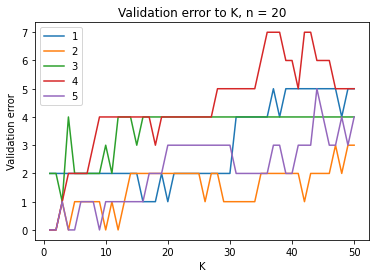

In [459]:
#Plot when n = 20
fig, ax = plt.subplots()
title = "Validation error to K, n = 20"
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(k, n20[0], label = "1")
plt.plot(k, n20[1], label = "2")
plt.plot(k, n20[2], label = "3")
plt.plot(k, n20[3], label = "4")
plt.plot(k, n20[4], label = "5")
plt.legend(loc = "upper left")


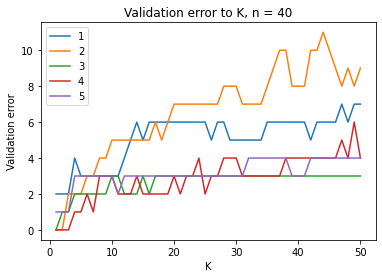

In [458]:
#Plot when n = 40
title = "Validation error to K, n = 40"
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(k, n40[0], label = "1")
plt.plot(k, n40[1], label = "2")
plt.plot(k, n40[2], label = "3")
plt.plot(k, n40[3], label = "4")
plt.plot(k, n40[4], label = "5")
plt.legend(loc = "upper left")



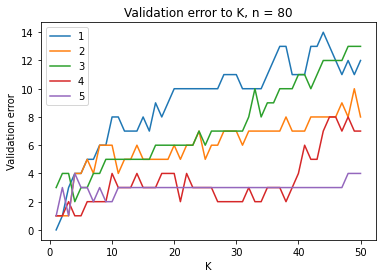

In [457]:
#Plot when n = 80
title = "Validation error to K, n = 80"
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(k, n80[0], label = "1")
plt.plot(k, n80[1], label = "2")
plt.plot(k, n80[2], label = "3")
plt.plot(k, n80[3], label = "4")
plt.plot(k, n80[4], label = "5")
plt.legend(loc = "upper left")


In [468]:
#calculate variance of validation error for each set

#First flatten the n10 to 80 lists
#Function to flatten out our n=10 to n=80 lists
def flatten(l):
    return [item for sublist in l for item in sublist]

n10Var = np.var(flatten(n10))
n20Var = np.var(flatten(n20))
n40Var = np.var(flatten(n40))
n80Var = np.var(flatten(n80))

vars = [n10Var, n20Var, n40Var, n80Var]

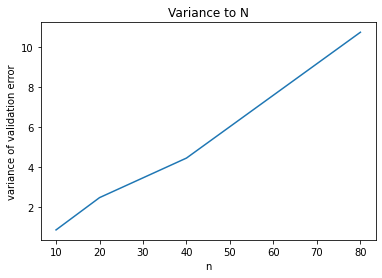

In [472]:
#Plot variance to n
title = "Variance to N"
xlabel = "n" 
ylabel = "variance of validation error" 
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(n, vars)
